In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
results = pd.read_csv(".temp/concat_csvs_results.csv")
results['FileSize'] = '~0.1 MB'
results['FileSize'].mask(results['FileKB'].between(100, 1000), '~1 MB', inplace=True)
results['FileSize'].mask(results['FileKB'].between(1000, 10000), '~10 MB', inplace=True)
results['FileSize'].mask(results['FileKB'].between(10000, 20000), '~20 MB', inplace=True)

In [51]:
results.head()

,Function,Path,FileCount,RowCount,FileKB,AvgRunTime,DriveType,IterCount,FileSize
0,single_threaded,D:\.temp\tmp5j88_jwv,2,200,93.261719,0.068860,M.2. SSD,10,~0.1 MB
1,multi_threaded,D:\.temp\tmp5j88_jwv,2,200,93.261719,0.075637,M.2. SSD,10,~0.1 MB
2,one_thread_per_file,D:\.temp\tmp5j88_jwv,2,200,93.261719,0.072994,M.2. SSD,10,~0.1 MB
3,multi_process,D:\.temp\tmp5j88_jwv,2,200,93.261719,6.768082,M.2. SSD,10,~0.1 MB
4,single_threaded,D:\.temp\tmp5j88_jwv,10,200,93.261719,0.336661,M.2. SSD,10,~0.1 MB


In [52]:
ssd = results[results['DriveType']=='SSD']

In [53]:
summary = ssd.pivot_table(values='AvgRunTime', aggfunc='mean', columns=['Function'], index=['FileCount', 'FileSize'])
summary = summary.reindex(columns=['single_threaded', 'multi_threaded', 'one_thread_per_file', 'multi_process'])
summary

Function            single_threaded  multi_threaded  one_thread_per_file  \
FileCount FileSize                                                         
2         ~0.1 MB          0.077177        0.071879             0.070994   
          ~1 MB            0.195387        0.140956             0.138384   
          ~10 MB           1.502026        0.985716             0.968148   
          ~20 MB           3.057094        1.804786             1.840519   
10        ~0.1 MB          0.286254        0.327260             0.320471   
          ~1 MB            0.979133        0.497742             0.479304   
          ~10 MB           7.316718        2.152414             2.160644   
          ~20 MB          15.119492        3.758084             3.867373   
100       ~0.1 MB          2.842518        3.107168             3.178195   
          ~1 MB            9.760879        4.823537             4.911401   
          ~10 MB          72.634632       19.870446            19.994871   
          ~20 MB         151.373390       36.290062            35.592058   

Function            multi_process  
FileCount FileSize                 
2         ~0.1 MB        6.756075  
          ~1 MB          6.794708  
          ~10 MB         7.604471  
          ~20 MB         8.595857  
10        ~0.1 MB        6.765667  
          ~1 MB          7.016924  
          ~10 MB         9.283074  
          ~20 MB        11.707926  
100       ~0.1 MB        7.583967  
          ~1 MB          9.093502  
          ~10 MB        29.793505  
          ~20 MB        48.973783

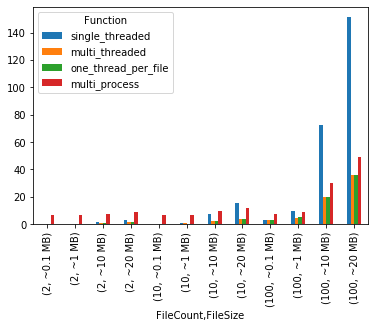

In [54]:
summary.plot.bar()

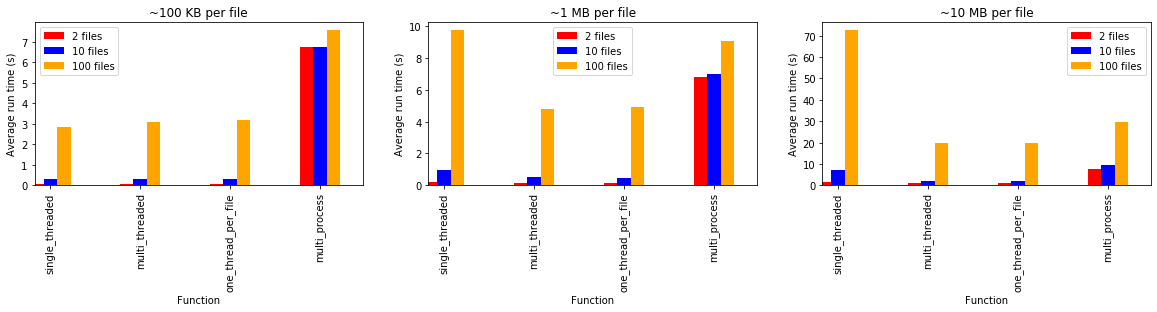

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 3))  #, subplot_kw={'xlim': [0, 150]})

ax = axes[0]
ax.set_title('~100 KB per file')
ax.set_ylabel('Average run time (s)')
df = ssd[ssd['FileKB'] < 100]
df[df['FileCount'] == 2].plot(kind='bar', x='Function', y='AvgRunTime', label='2 files', ax=ax, width=0.15, position=1.5, color='red')
df[df['FileCount'] == 10].plot(kind='bar', x='Function', y='AvgRunTime', label='10 files', ax=ax, width=0.15, position=0.5, color='blue')
df[df['FileCount'] == 100].plot(kind='bar', x='Function', y='AvgRunTime', label='100 files', ax=ax, width=0.15, position=-0.5, color='orange')

ax = axes[1]
ax.set_title('~1 MB per file')
ax.set_ylabel('Average run time (s)')
df = ssd[ssd['FileKB'].between(100, 1000)]
df[df['FileCount'] == 2].plot(kind='bar', x='Function', y='AvgRunTime', label='2 files', ax=ax, width=0.15, position=1.5, color='red')
df[df['FileCount'] == 10].plot(kind='bar', x='Function', y='AvgRunTime', label='10 files', ax=ax, width=0.15, position=0.5, color='blue')
df[df['FileCount'] == 100].plot(kind='bar', x='Function', y='AvgRunTime', label='100 files', ax=ax, width=0.15, position=-0.5, color='orange')

ax = axes[2]
ax.set_title('~10 MB per file')
ax.set_ylabel('Average run time (s)')
df = ssd[ssd['FileKB'].between(1000, 10000)]
df[df['FileCount'] == 2].plot(kind='bar', x='Function', y='AvgRunTime', label='2 files', ax=ax, width=0.15, position=1.5, color='red')
df[df['FileCount'] == 10].plot(kind='bar', x='Function', y='AvgRunTime', label='10 files', ax=ax, width=0.15, position=0.5, color='blue')
df[df['FileCount'] == 100].plot(kind='bar', x='Function', y='AvgRunTime', label='100 files', ax=ax, width=0.15, position=-0.5, color='orange')
